# Data Preparation for Task - 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
from torch import nn
from torch import optim
import torch.nn.functional as F

from PIL import Image

In [2]:
train = np.load('data/train/imgs.npy')

In [3]:
labels = np.load('data/train/labels.npy')

In [4]:
class CNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(4 * 4 * 64, num_classes)

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

In [5]:
trained_model = torch.load('../Task 1/Notebooks/cnn_fully_trained.pth')

In [6]:
def get_digit_image_from_grid(sudoku_image, row, column, digit_size=28):
    left = column * digit_size
    upper = row * digit_size
    right = left + digit_size
    lower = upper + digit_size
    
    digit_image = Image.fromarray(sudoku_image[upper:lower, left:right])
    digit_array = np.array(digit_image)

    return digit_image , digit_array

In [7]:
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
get_random_image = np.random.choice(len(train))
#plt.imshow(train[get_random_image])
row = np.random.choice(9)
column=np.random.choice(9)
# row = int(input('Enter the row: '))
# column = int(input('Enter the column'))
_, img_array = get_digit_image_from_grid(train[get_random_image], row,column)
plt.imshow(img_array)
img = torch.tensor(img_array,  dtype=torch.float32)
img = img.to(device)
img = img.view(-1, 1, 28, 28)
with torch.no_grad():
    is_zero = torch.all(img == 0).item()
    if is_zero:
        pred = 0
                    #print(pred)
    else : 
        logits = trained_model.forward(img)
        print(f'The logits from the model: {logits}')
        probabilities = F.softmax(logits, dim=1).detach().cpu().numpy().squeeze()
        print(f'The probabilities from the model: {probabilities}')
        pred = np.argmax(probabilities)
        print(f'Prediction: {pred}')

# Making the Train image Sudoku grids 

In [8]:
train_sudoku_grids = []
trained_model.eval()
for idx in range(len(train)):
    actual_train_grid = np.zeros((9,9))
    for row in range(0,9):
        for col in range(0,9):
            _, img_array = get_digit_image_from_grid(train[idx], row,col)
            img = torch.tensor(img_array,  dtype=torch.float32)
            img = img.to(device)
            img = img.view(-1, 1, 28, 28)
            with torch.no_grad():
                is_zero = torch.all(img == 0).item()
                if is_zero:
                    pred = 0
                    #print(pred)
                else : 
                    logits = trained_model.forward(img)
                    probabilities = F.softmax(logits, dim=1).detach().cpu().numpy().squeeze()
                    pred = np.argmax(probabilities)
            actual_train_grid[row,col] = pred
    train_sudoku_grids.append(actual_train_grid)

In [9]:
sudoku_train_grids = np.array(train_sudoku_grids)
np.save('sudoku_train_grids.npy' , sudoku_train_grids)    # to save the grids to a numpy array of the train images

# Making Train image Sudoku grids labels

In [10]:
import time

start_time = time.time()
trained_model.to(device)

train_sudoku_grids_labels = []
for idx in range(len(labels)):
    actual_train_grid_label = np.zeros((9,9))
    for row in range(0,9):
        for col in range(0,9):
            _, img_array = get_digit_image_from_grid(labels[idx], row,col)
            img = torch.tensor(img_array,  dtype=torch.float32)
            img = img.to(device)
            img = img.view(-1, 1, 28, 28)
            with torch.no_grad():
                is_zero = torch.all(img == 0).item()
                if is_zero:
                    pred = 0
                    #print(pred)
                else : 
                    logits = trained_model.forward(img)
                    probabilities = F.softmax(logits, dim=1).detach().cpu().numpy().squeeze()
                    pred = np.argmax(probabilities)
            actual_train_grid_label[row,col] = pred
    train_sudoku_grids_labels.append(actual_train_grid_label)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total time taken to create train label grids : {elapsed_time} seconds")

Total time taken to create train label grids : 6156.292396306992 seconds


In [16]:
sudoku_train_grids_labels = np.array(train_sudoku_grids_labels)
np.save('sudoku_train_grids_labels.npy' , sudoku_train_grids_labels)

In [17]:
sudoku_grids = np.load("sudoku_train_grids.npy")
len(sudoku_grids)

50000

In [18]:
sudoku_grids_labels = np.load("sudoku_train_grids_labels.npy")
len(sudoku_grids_labels)

50000

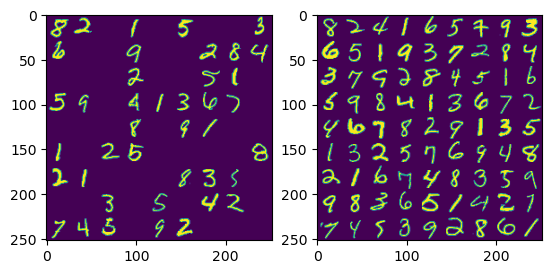

In [19]:
plt.subplot(121)
plt.imshow(train[3344])

plt.subplot(122)
plt.imshow(labels[3344])

In [20]:
sudoku_grids_labels[3344]

array([[8., 2., 4., 1., 6., 5., 7., 9., 3.],
       [6., 5., 1., 9., 3., 7., 2., 8., 4.],
       [3., 7., 9., 2., 8., 4., 5., 1., 6.],
       [5., 9., 8., 4., 1., 3., 6., 7., 2.],
       [4., 6., 7., 8., 2., 9., 1., 3., 5.],
       [1., 3., 2., 5., 7., 6., 9., 4., 8.],
       [2., 1., 6., 7., 4., 8., 3., 5., 9.],
       [9., 8., 3., 6., 5., 1., 4., 2., 7.],
       [7., 4., 5., 3., 9., 2., 8., 6., 1.]])

# Making Test image Sudoku grids

In [21]:
test = np.load("data/test/Test/imgs.npy")

In [22]:
import time

start_time = time.time()

test_sudoku_grids = []
for idx in range(len(test)):
    actual_test_grid = np.zeros((9,9))
    for row in range(0,9):
        for col in range(0,9):
            _, img_array = get_digit_image_from_grid(test[idx], row,col)
            img = torch.tensor(img_array,  dtype=torch.float32)
            img = img.to(device)
            img = img.view(-1, 1, 28, 28)
            with torch.no_grad():
                is_zero = torch.all(img == 0).item()
                if is_zero:
                    pred = 0
                    #print(pred)
                else : 
                    logits = trained_model.forward(img)
                    probabilities = F.softmax(logits, dim=1).detach().cpu().numpy().squeeze()
                    pred = np.argmax(probabilities)
            actual_test_grid[row,col] = pred
    test_sudoku_grids.append(actual_test_grid)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total time taken to create train label grids : {elapsed_time} seconds")


Total time taken to create train label grids : 701.9096307754517 seconds


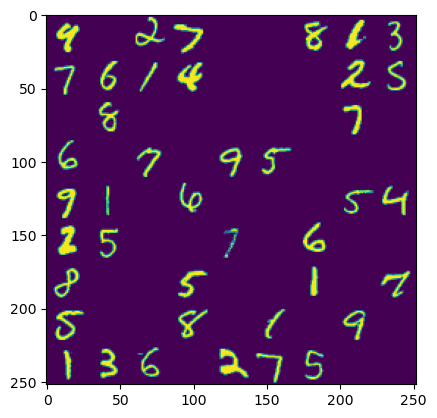

In [23]:
plt.imshow(test[0])

In [24]:
test_sudoku_grids[0]

array([[9., 0., 2., 7., 0., 0., 8., 6., 3.],
       [7., 6., 1., 4., 0., 0., 0., 2., 5.],
       [0., 8., 0., 0., 0., 0., 0., 7., 0.],
       [6., 0., 7., 0., 9., 5., 0., 0., 0.],
       [9., 1., 0., 6., 0., 0., 0., 5., 4.],
       [2., 5., 0., 0., 7., 0., 6., 0., 0.],
       [8., 0., 0., 5., 0., 0., 1., 0., 7.],
       [5., 0., 0., 8., 0., 1., 0., 9., 0.],
       [1., 3., 6., 0., 2., 7., 5., 0., 0.]])

In [25]:
sudoku_test_grids = np.array(test_sudoku_grids)
np.save('sudoku_test_grids.npy' , sudoku_test_grids)